In [10]:
from pypylon import pylon 

# Pypylon get camera by serial number
serial_number = '22305622'
info = None
for i in pylon.TlFactory.GetInstance().EnumerateDevices():
    if i.GetSerialNumber() == serial_number:
        info = i
        break
else:
    print('Camera with {} serial number not found'.format(serial_number))

# VERY IMPORTANT STEP! To use Basler PyPylon OpenCV viewer you have to call .Open() method on you camera
if info is not None:
    camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateDevice(info))
    camera.Open()

In [12]:

	

print(camera.PixelFormat.Symbolics)
print ("camera.PixelFormat.GetValue: ", camera.PixelFormat.GetValue())


('Mono8', 'BayerBG8', 'BayerBG10', 'BayerBG10p', 'RGB8', 'BGR8', 'YCbCr422_8')
camera.PixelFormat.GetValue:  BayerBG8


In [4]:
from pypylon_opencv_viewer import BaslerOpenCVViewer
viewer = BaslerOpenCVViewer(camera)

In [7]:
# Example of configuration for basic RGB camera's features
VIEWER_CONFIG_RGB_MATRIX = {
    "features": [

        {
            "name": "Height",
            "type": "int",
            "value": 1080,
            "unit": "px",
            "step": 2,
        },
        {
            "name": "Width",
            "type": "int",
            "value": 1920,
            "unit": "px",
            "step": 2,
        },
        {
            "name": "CenterX",
            "type": "bool",
        },
        {
            "name": "CenterY",
            "type": "bool",

        },
        {
            "name": "OffsetX",
            "type": "int",
            "dependency": {"CenterX": False},
            "unit": "px",
            "step": 2,
        },
        {
            "name": "OffsetY",
            "type": "int",
            "dependency": {"CenterY": False},
            "unit": "px",
            "step": 2,
        },

        {
            "name": "AcquisitionFrameRateEnable",
            "type": "bool",
        },
        {
            "name": "ExposureAuto",
            "type": "choice_text",
            "options": ["Off", "Once", "Continuous"],
            "style": {"button_width": "90px"}
        },

        {
            "name": "BalanceWhiteAuto",
            "type": "choice_text",
            "options": ["Off", "Once", "Continuous"],
            "style": {"button_width": "90px"}
        },
    ],
    "features_layout": [
        ("Height", "Width"), 
        ("OffsetX", "CenterX"), 
        ("OffsetY", "CenterY"), 
        ("ExposureAuto", "ExposureTimeAbs"),
        ("AcquisitionFrameRateAbs", "AcquisitionFrameRateEnable"),
        ("BalanceWhiteAuto", "GainRaw")
    ],
    "actions_layout": [
        ("StatusLabel"),
        ("SaveConfig", "LoadConfig", "ContinuousShot", "SingleShot"), 
        ("UserSet")
    ],
    "default_user_set": "UserSet3",
}
viewer.set_configuration(VIEWER_CONFIG_RGB_MATRIX)

In [10]:
import cv2
import numpy as np
def impro(img):
   return np.hstack([img, (255-img)])
viewer.set_impro_function(impro)

In [11]:
import cv2
import numpy as np
def impro(img):
    cv2.namedWindow('1', cv2.WINDOW_NORMAL | cv2.WINDOW_GUI_NORMAL)
    cv2.resizeWindow('1', 1080, 720)
    cv2.imshow("1", np.hstack([img, (255-img)]))
viewer.set_impro_function(impro, own_window=True)

In [12]:
import cv2
import numpy as np
# Get grabbed image
img = viewer.get_image()

In [9]:
camera.Close()

In [19]:
from pypylon import pylon
import cv2

# conecting to the first available camera
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# Grabing Continusely (video) with minimal delay
camera.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data
        image = converter.Convert(grabResult)
        img = image.GetArray()
        cv2.namedWindow('title', cv2.WINDOW_NORMAL)
        cv2.imshow('title', img)
        k = cv2.waitKey(1)
        if k == 27:
            break
    grabResult.Release()
    
# Releasing the resource    
camera.StopGrabbing()

cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
def experiment_json(magnitude, cycle_percent, cycle_preload_t, cycle_stretch_t, cycle_hold_t)

In [1]:
class Sets():
    #options
    control_mode = 'Displacemnet'
    control_function = 'Ramp'
    magnitude = 0
    magnitude_percent_X = 0
    magnitude_percent_Y = 0
    preload_magnitude_X = 0
    preload_magnitude_Y = 0
    stretch_phase_time = 0
    hold_phase_time = 0
    recover_phase_time = 0
    rest_phase_time = 0
    cycle_count = 1
    delta_time = 1
    result={}
    #can be replace by previous mesurement
    result_time = 0
    
    #func prepearing data to send to controller
    def prepare_data(self):
        #stretch lenght 
        mag_x = self.magnitude/100*self.magnitude_percent_X
        mag_y = self.magnitude/100*self.magnitude_percent_Y
        
        #cycle_time = self.stretch_phase_time+self.hold_phase_time+self.recover_phase_time+self.rest_phase_time
        
        stretch_speed_x = mag_x/self.stretch_phase_time
        stretch_speed_y = mag_y/self.stretch_phase_time
        recover_speed_x = mag_x/self.recover_phase_time
        recover_speed_y = mag_y/self.recover_phase_time
        #saves end time
        full_time = self.result_time
        
        for counta in range (0,self.cycle_count):
            #stretch phase            
            for t in range(1,self.stretch_phase_time+self.delta_time,self.delta_time):
                self.result[full_time + t] = (((stretch_speed_x*self.delta_time)/2,(stretch_speed_x*self.delta_time)/2),
                                  ((stretch_speed_y*self.delta_time)/2,(stretch_speed_y*self.delta_time)/2))
            full_time = full_time + self.stretch_phase_time  
            #hold phase
            for t in range(1,self.hold_phase_time+self.delta_time,self.delta_time):
                self.result[full_time + t] = ((0,0),(0,0))
            full_time = full_time + self.hold_phase_time
            #recover phase    
            for t in range(1,self.recover_phase_time+self.delta_time,self.delta_time):
                self.result[full_time + t] = (((-recover_speed_x*self.delta_time)/2,(-recover_speed_x*self.delta_time)/2),
                                  ((-recover_speed_y*self.delta_time)/2,(-recover_speed_y*self.delta_time)/2))
            full_time = full_time + self.recover_phase_time
            #rest phase                
            for t in range(1,self.rest_phase_time+self.delta_time,self.delta_time):
                self.result[full_time + t] = ((0,0),(0,0))   
                              
            full_time = full_time + self.rest_phase_time    
            self.result_time = full_time   
            
        
        
    
        

In [2]:
MAGNITUDE = 200

In [3]:
c1 = Sets()
c1.cycle_count = 5
c1.magnitude = MAGNITUDE
c1.magnitude_percent_X = 10
c1.magnitude_percent_Y = 10
c1.stretch_phase_time = 10
c1.recover_phase_time = 10
c1.prepare_data()


In [4]:
c1.result_time

200

In [4]:
c2 = Sets()
c2.cycle_count = 5
c2.magnitude = MAGNITUDE
c2.magnitude_percent_X = 20
c2.magnitude_percent_Y = 20
c2.stretch_phase_time = 10
c2.recover_phase_time = 10
c2.result_time = c1.result_time
c2.prepare_data()


In [5]:
c3 = Sets()
c3.cycle_count = 5
c3.magnitude = MAGNITUDE
c3.magnitude_percent_X = 40
c3.magnitude_percent_Y = 40
c3.stretch_phase_time = 10
c3.recover_phase_time = 10
c3.result_time = c2.result_time
c3.prepare_data()

In [6]:
import json
data = json.dumps(c3.result)
with open ('test.json', 'w') as f:
     f.write(data)

In [9]:
c1.prepare_data()


In [16]:
c1.result[-1]

KeyError: -1

In [15]:
import json
data = json.dumps(c1.result)
with open ('test.json', 'w') as f:
     f.write(data)

In [7]:
from harvesters.core import Harvester

In [9]:
h = Harvester()
h.add_file("ProducerU3V.cti")

In [10]:
h.files

['ProducerU3V.cti']

In [11]:
h.update()

In [12]:
h.device_info_list

[]

In [31]:
import gxipy as gx
device_manager = gx.DeviceManager()
dev_num, dev_info_list = device_manager.update_device_list()
str_mac = dev_info_list[0].get("mac")
cam = device_manager.open_device_by_mac(str_mac)
#cam.stream_on()

InvalidAccess: DeviceManager.open_device_by_mac:{-8}{The device has already been opened}

In [27]:
cam.get_stream_channel_num()

1

In [25]:
cam.close_device()

In [28]:
# Start acquisition
cam.stream_on()
raw_image = cam.data_stream[0].get_image()
if raw_image.get_status() == gx.GxFrameStatusList.INCOMPLETE:
    print("incomplete frame")
# Stop acquisition
cam.stream_off()


In [29]:
raw_image.save_raw("raw_image.raw")
rgb_image = raw_image.convert("RGB")
if rgb_image is None:
    print('No RGB image')
numpy_image = rgb_image.get_numpy_array()
if numpy_image is None:
    print('No numpy image')

In [30]:
print(numpy_image)

[[[234 219  85]
  [233 218  85]
  [233 216  85]
  ...
  [196 143  54]
  [196 146  55]
  [196 146  55]]

 [[229 216  85]
  [232 215  85]
  [232 214  85]
  ...
  [188 142  54]
  [188 143  55]
  [188 143  55]]

 [[229 215  83]
  [232 214  83]
  [232 213  80]
  ...
  [188 142  55]
  [188 143  53]
  [188 143  53]]

 ...

 [[255 255 247]
  [255 255 247]
  [255 255 246]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 241]
  [255 255 241]
  [255 255 239]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 241]
  [255 255 241]
  [255 255 239]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [23]:
raw_image = cam.data_stream[0].get_image()
# Get numpy array from mono raw images
numpy_image = raw_image.get_numpy()
if numpy_image is None:
    pass
# Then, the user can display and save the image according to the 
#got numpy_array
print(numpy_image)

AttributeError: 'RawImage' object has no attribute 'get_numpy'

In [16]:
# Display and save the got color image
import numpy as np

image = Image.fromarray(numpy_image, 'RGB')
image.show()
image.save("acquisition_RGB_image.jpg")


NameError: name 'Image' is not defined

In [ ]:
# Display and save the got mono image
image = Image.fromarray(numpy_image, 'L')
image.show()
image.save("acquisition_mono_image.jpg")

In [2]:
import json
with open ('res.json','r') as f:
    res = json.loads(f.read())
print(type(res))

<class 'dict'>


In [18]:
x = []
y1 = []
y2 = []
y3 = []

for item in res:
    if res[item] !='' and int(item) > 0:
        x.append(item)
        print(res[item].split(','))
for item in res:
    print(item)
    if res[item] !='' and int(item) > 0:
        y1.append(float(res[item].split(',')[0]))
        y2.append(float(res[item].split(',')[1]))
        y3.append(float(res[item].split(',')[3]))
    

['344.75', '4359563.50', 'inf', '287.37']
['344.08', '4364008.00', 'inf', '360.14']
['788.38', '5042737.00', 'inf', '1129.38']
['1342.90', '4612833.00', 'inf', '1624.40']
['1742.71', '4754467.00', 'inf', '2011.01']
['2036.02', '4721559.00', 'inf', '2274.25']
['2280.62', '4546427.00', 'inf', '2528.67']
['2481.10', '4499172.00', 'inf', '2688.11']
['2636.97', '4367635.50', 'inf', '2837.69']
['2756.41', '4571166.00', 'inf', '2909.75']
['2223.37', '4454400.50', 'inf', '1860.74']
['1601.01', '4362831.50', 'inf', '1413.93']
['1308.80', '4553224.50', 'inf', '1157.33']
['1065.18', '4423910.50', 'inf', '941.12']
['866.03', '4409759.50', 'inf', '724.94']
['666.59', '4348027.50', 'inf', '516.29']
['451.27', '4360511.00', 'inf', '250.28']
['157.41', '4212340.50', 'inf', '-122.09']
['277.96', '4446884.00', 'inf', '493.04']
['722.84', '4520185.50', 'inf', '869.68']
['1035.48', '4428158.50', 'inf', '1153.41']
['1280.47', '4321132.00', 'inf', '1391.92']
['1489.12', '4342210.50', 'inf', '1629.04']
['171

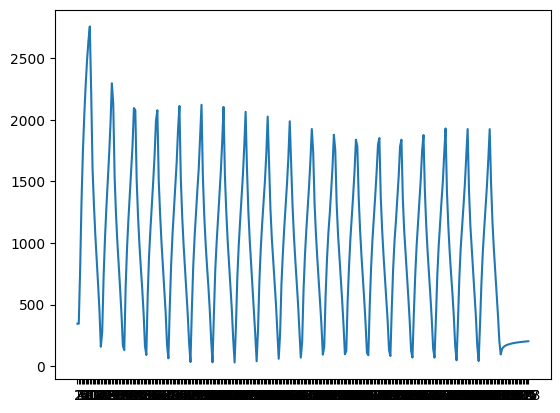

In [19]:
import matplotlib.pyplot as plt
plt.plot(x,y1)



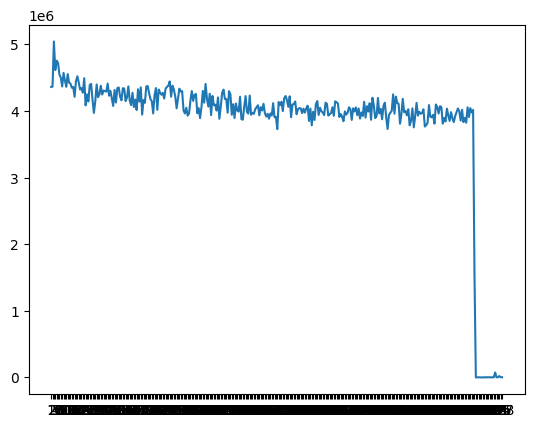

In [20]:
plt.plot(x,y2)


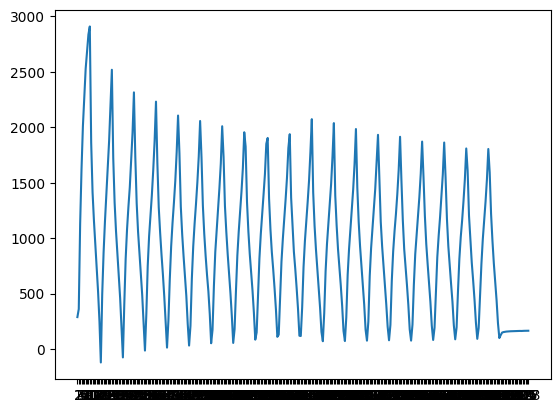

In [21]:
plt.plot(x,y3)
